### Import models and load data

In [1]:
import torch
torch.manual_seed(1234)

from importlib import reload
import generic_helpers
reload(generic_helpers)
from generic_helpers import *
import sys

mini_batch_size = 1000
nb_runs = 2

### 1channel2images

In [ ]:
sys.path.insert(0, "channelimagesModels")
import BaseNet
reload(BaseNet)
from BaseNet import *
import ConvNet1
reload(ConvNet1)
from ConvNet1 import *
import _1channel2images
reload(_1channel2images)
from _1channel2images import *
print("Working with 1channel2images framework, nb_classes = ", nb_classes)

In [ ]:
model1C_list = [BaseNet1C(), ConvNet1_1C()]
lr = 0.01
nb_epochs = 100 # way sufficient for this framework
for model_1C in model1C_list:
    test_results_1C = multiple_training_runs_1C(model_1C, nb_runs, lr, mini_batch_size, nb_epochs, verbose=True)
    write_to_csv_1C('1channel2images.csv', model_1C, test_results_1C, lr, nb_epochs)

In [ ]:
import pandas as pd
print(test_results_1C)
write_to_csv_1C('1channel2images.csv', model_1C, test_results_1C, lr, nb_epochs)
data = pd.read_csv('1channel2images.csv')
data.head()

### 2channels1image

In [4]:
sys.path.insert(0, "channelimagesModels")
import BaseNet
reload(BaseNet)
from BaseNet import *
import ConvNet1
reload(ConvNet1)
from ConvNet1 import *
import _2channels1image
reload(_2channels1image)
from _2channels1image import *
import test
reload(test)
from test import *
print("Working with 2channels1image framework, nb_classes = ", nb_classes)

Working with 2channels1image framework, nb_classes =  1


In [ ]:
model2C_list = [BaseNet2C(), ConvNet1_2C(), ConvNet2_2C()]
nb_epochs_list = [100, 200, 150]
for (nb_epochs, model_2C) in zip(nb_epochs_list, model2C_list):
    test_results_2C = multiple_training_runs_fn(model_2C, train_model_2C, test_model_2C, title_2C, nb_runs, lr, 
                                                mini_batch_size, nb_epochs, verbose=True)
    write_to_csv('2channels1image.csv', model_2C, test_results_2C, lr, nb_epochs)

In [ ]:
print(test_results_2C)
write_to_csv('2channels1image.csv', model_2C, test_results_2C, lr, nb_epochs)
data = pd.read_csv('2channels1image.csv')
data.head()

### Weight Sharing

In [ ]:
sys.path.insert(0, "weightssharingModels")
import NetSharing
reload(NetSharing)
from NetSharing import *
import weight_sharing
reload(weight_sharing)
from weight_sharing import *
print("Working with weight_sharing framework")

In [ ]:
modelws_list = [NetSharing1(), NetSharing2(), NetSharing3()] # Stronger reg on Net3
nb_epochs_list = [150, 150, 200]
for (nb_epochs, model_ws) in zip(nb_epochs_list, modelws_list):
    test_results_ws = multiple_training_runs_fn(model_ws, train_model_ws, test_model_ws, title_ws, nb_runs, lr, 
                                                 mini_batch_size, nb_epochs, verbose=True)
    write_to_csv('weightsharing.csv', model_ws, test_results_ws, lr, nb_epochs)

In [ ]:
import pandas as pd
print(test_results_ws)
write_to_csv('weightsharing.csv', model_ws, test_results_ws, lr, nb_epochs)
data = pd.read_csv('weightsharing.csv')
data.head()

### Auxiliary Losses

In [49]:
sys.path.insert(0, "auxiliarylossesModels")
import Incept
reload(Incept)
from Incept import *
import auxiliary_losses
reload(auxiliary_losses)
from auxiliary_losses import *
import generic_helpers
reload(generic_helpers)
from generic_helpers import *
import test
reload(test)
from test import *
print("Working with auxiliary losses framework")

Working with auxiliary losses framework


phase: train, epoch: 100, loss: 1.45086, acc: 0.8390
phase: val, epoch: 100, loss: 1.36118, acc: 0.8760
Training complete in 2 min 57 s
Best val acc: 0.8760
phase: train, epoch: 100, loss: 1.52124, acc: 0.7960
phase: val, epoch: 100, loss: 1.43059, acc: 0.8410
Training complete in 3 min 36 s
Best val acc: 0.8410


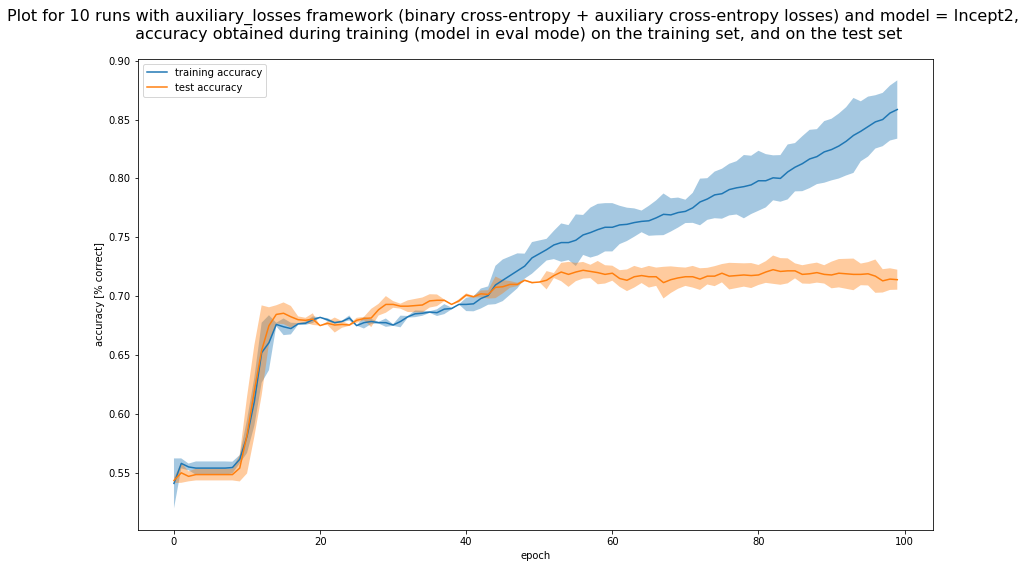

In [50]:
#modelaux_list = [Incept1(), Incept2(), Incept3(), Incept4()] # Stronger reg and longer training on Incept3
#nb_epochs_list = [100, 100, 300, 100]
lr = 0.01

modelaux_list = [Incept2()]
nb_epochs = 100
for model_aux in modelaux_list:
    
#for nb_epochs, model_aux in zip(nb_epochs_list, modelaux_list):
    test_results_aux = multiple_training_runs_fn(model_aux, train_model_aux, test_model_aux, title_aux, nb_runs, lr,
                                                 mini_batch_size, nb_epochs, verbose=True)
    write_to_csv('auxiliary_losses.csv', model_aux, test_results_aux, lr, nb_epochs)

In [51]:
import pandas as pd
print(test_results_aux)
write_to_csv('auxiliary_losses.csv', model_aux, test_results_aux, lr, nb_epochs)
data = pd.read_csv('auxiliary_losses.csv')
data.head()

(196.4480984210968, 27.796740106123046, 0.8585, 0.024748737341529183, 0.714, 0.008485281374238578)


,Model,Number of parameters,Learning rate,Number of epochs,Training time,Mean best training accuracy,Std best training accuracy,Mean test accuracy,Std test accuracy
0,Incept1,175027,0.01,100,67.33,0.7645,0.0262,0.714,0.0156
1,Incept2,385091,0.01,100,196.45,0.8585,0.0247,0.714,0.0085
2,Incept3,64483,0.01,300,245.70,0.7775,0.0007,0.686,0.0028
3,Incept4,247253,0.01,100,72.96,0.7655,0.0148,0.699,0.0255
